# LAB 03 - Data preprocessing

## 04 데이터 정제 - 이상치
- 이상치는 정상 범주에서 크게 벗어난 값.
- 분석가의 주관을 개입하는 경우도 있지만, ESD, 상자그림 등 통계적인 기준을 이용하기도 한다
- 이상치 정제의 일반적인 과정
   1) 결측치 정제
   2) 이상치 찾기
   3) 이상치를 결측치로 변경
   4) 결측치 정제 방법 적용


### #01.준비 작업
라이브러리 참고


In [1]:
import numpy as np
from hossam import load_data
from pandas import DataFrame
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt

In [2]:
#데이터 가져오기
origin = load_data('ref_sample')
origin

[data] https://data.hossam.kr/data/lab03/ref_sample.xlsx
[desc] 데이터 정제를 위한 실습용 데이터
[!] Cannot read metadata


,kor,eng,math,sic
name,,,,
철수,98.0,77,88.0,64.0
영희,88.0,120,62.0,72.0
민철,NaN,70,83.0,79.0
수현,63.0,60,31.0,71.0
호영,75.0,50,90.0,NaN
영호,80.0,88,91.0,72.0
용식,82.0,88,NaN,90.0
나영,90.0,92,81.0,NaN
석영,91.0,90,89.0,80.0


### #02.결측치 정제하기
- 기존에 있는 결측치를 평균으로 대체하기


In [3]:
imr = SimpleImputer(missing_values=np.nan,strategy='mean')
df_imr = imr.fit_transform(origin.values)
re_df = DataFrame(df_imr,index=origin.index,columns=origin.columns)
re_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,120.0,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


### #03.이상치가 존재하는 변수 확인
- 상자그림 확인하기

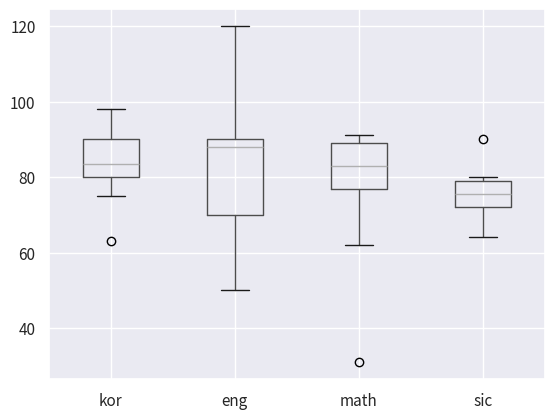

In [4]:
re_df.boxplot()
plt.show()

### #04.분석가의 주관에 의한 이상치 판별
- 점수가 100점을 초과한 경우는 이상치로 판단하여 nan 처리 
- nan 결측치로 처리된 이상치 값에 대해서 추가로 결측치 처리

In [5]:
re_df.loc[re_df['eng']>100,'eng'] = np.nan
re_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,NaN,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


In [6]:
imr = SimpleImputer(missing_values=np.nan,strategy='mean')
df_imr = imr.fit_transform(re_df.values)
outline_df = DataFrame(df_imr,index=re_df.index,columns=re_df.columns)
outline_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,63.000,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


### #05.극단치 경계값을 계산하여 이상치 찾기
- 사분위간 범위 계산
  iqr = Q3-Q1

In [7]:
outline_df2 = outline_df.copy()
국어Q1 = outline_df2['kor'].quantile(0.25)
국어Q3 = outline_df2['kor'].quantile(0.75)

국어iqr = 국어Q3-국어Q1
print('국어 점수의 사분위간 범위 :' ,국어iqr)

국어 점수의 사분위간 범위 : 10.0


In [8]:
#극단치 경계값 찾기
outline_max = 국어Q3 + 국어iqr *1.5
outline_min = 국어Q1 - 국어iqr *1.5
print("상한 근단치 경계" , outline_max)
print("하한 근단치 경계" , outline_min)

상한 근단치 경계 105.0
하한 근단치 경계 65.0


In [9]:
#극단치 경계값을 활용한 이상치 확인
# 1) 하한 이상치 확인

outline_df2.loc[outline_df2['kor']<outline_min,'kor']



name
수현    63.0
Name: kor, dtype: float64

In [10]:
#2) 하한 이상치를 결측치로 변환
outline_df2.loc[outline_df2['kor'] < outline_min, 'kor'] = np.nan

outline_df2

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [11]:
# 3) 상한 이상치를 결측치로 변환
outline_df2.loc[outline_df2['kor'] > outline_max, 'kor'] = np.nan

outline_df2

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [12]:
# 4) 극단치 경계값을 활용한 이상치 확인 
# 수학 점수에 대한 처리

# 1) 수학 점수 사분위수와 IQR 계산
math_Q1  = outline_df2['math'].quantile(0.25)   # 수학 Q1
math_Q3  = outline_df2['math'].quantile(0.75)   # 수학 Q3
math_iqr = math_Q3 - math_Q1                    # 수학 IQR

# 2) 수학 극단치 상·하 경계값 계산
outline_max = math_Q3 + math_iqr * 1.5
outline_min = math_Q1 - math_iqr * 1.5

# 3) 하한보다 작은 값, 상한보다 큰 값 → NaN 처리
outline_df2.loc[outline_df2['math'] < outline_min, 'math'] = np.nan
outline_df2.loc[outline_df2['math'] > outline_max, 'math'] = np.nan

outline_df2


,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,NaN,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [13]:
#과학 점수에 대한 처리

# 1) 과학 점수 사분위수와 IQR 계산
sic_Q1  = outline_df2['sic'].quantile(0.25)   # 과학 Q1
sic_Q3  = outline_df2['sic'].quantile(0.75)   # 과학 Q3
sic_iqr = sic_Q3 - sic_Q1                     # 과학 IQR

# 2) 과학 극단치 상·하 경계값 계산
outline_max = sic_Q3 + sic_iqr * 1.5
outline_min = sic_Q1 - sic_iqr * 1.5

# 3) 이상치 → NaN 처리
outline_df2.loc[outline_df2['sic'] < outline_min, 'sic'] = np.nan
outline_df2.loc[outline_df2['sic'] > outline_max, 'sic'] = np.nan

outline_df2


,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,NaN,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,NaN
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [14]:
# 5) 결측치로 변환된 값들을 평균으로 치환하여 처리
from sklearn.impute import SimpleImputer
from pandas import DataFrame

# 1) 평균값으로 결측치를 채우는 Imputer 정의
imr = SimpleImputer(missing_values=np.nan, strategy='mean')

# 2) DataFrame 값을 넘겨서 학습 + 변환
df_imr = imr.fit_transform(outline_df2.values)

# 3) 다시 DataFrame 형태로 복원
final_df = DataFrame(df_imr, index=outline_df2.index, columns=outline_df2.columns)

final_df


,kor,eng,math,sic
name,,,,
철수,98.000000,77.000,88.000000,64.000000
영희,88.000000,76.875,62.000000,72.000000
민철,83.375000,70.000,83.000000,79.000000
수현,85.921875,60.000,82.609375,71.000000
호영,75.000000,50.000,90.000000,75.428571
영호,80.000000,88.000,91.000000,72.000000
용식,82.000000,88.000,76.875000,73.607143
나영,90.000000,92.000,81.000000,75.428571
석영,91.000000,90.000,89.000000,80.000000
